In [6]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("./data/trip.csv")

# 데이터 기본 정보 확인
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB
None
       passenger_count  trip_distance   fare_amount    tip_amount  \
count     22701.000000   22701.000000  22698.000000  22701.000000   
mean          1.643584       2.913400     13.024009      1.835745   
std           1.304942       3.653023     13.2

In [7]:
# 결측치 개수 확인
print(df.isnull().sum())

# 결측치 비율 확인
missing_ratio = df.isnull().mean() * 100
print(missing_ratio)

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64
passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.013215
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64


In [8]:
# 나머지 결측치는 평균으로 대체
df['trip_distance'].fillna(df['trip_distance'].mean(), inplace=True)

C:\Users\1\AppData\Local\Temp\ipykernel_14312\469052647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trip_distance'].fillna(df['trip_distance'].mean(), inplace=True)


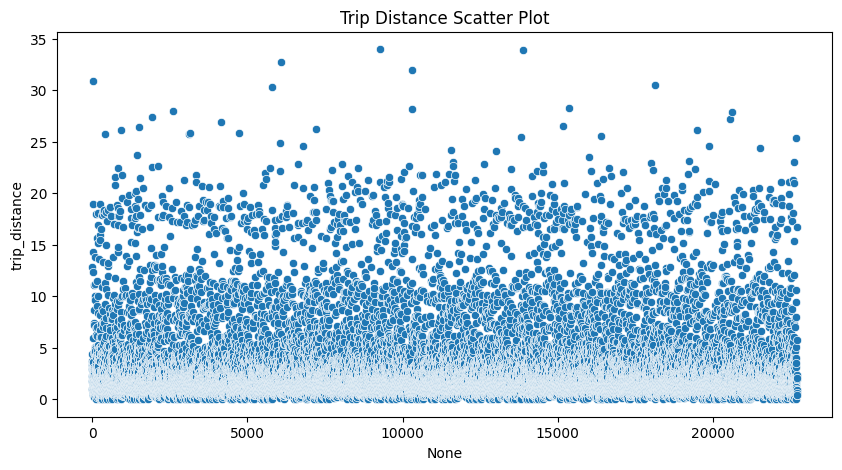

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 거리와 요금의 이상치 확인
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df.index, y=df['trip_distance'])
plt.title('Trip Distance Scatter Plot')
plt.show()

In [10]:
# IQR 방식으로 이상치 제거
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# 거리 기준 이상치 제거
df = df[(df['trip_distance'] >= Q1 - 1.5*IQR) & (df['trip_distance'] <= Q3 + 1.5*IQR)]

In [13]:
# datetime 타입으로 변환
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [14]:
# 주행 시간 feature 생성
df['tpep_pickup_datetime'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60  # 분 단위

In [20]:
# Credit / Debit 통합
df['payment_method'] = df['payment_method'].replace({'Credit Card': 'Card', 'Debit Card': 'Card'})

In [21]:
#  최종 확인 및 저장
print(df.info())
print(df.describe())
df.to_csv("cleaned_trip.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 20174 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         20174 non-null  object        
 1   tpep_pickup_datetime   20174 non-null  float64       
 2   tpep_dropoff_datetime  20174 non-null  datetime64[ns]
 3   payment_method         20174 non-null  object        
 4   passenger_count        20174 non-null  int64         
 5   trip_distance          20174 non-null  float64       
 6   fare_amount            20173 non-null  float64       
 7   tip_amount             20174 non-null  float64       
 8   tolls_amount           20174 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 1.5+ MB
None
       tpep_pickup_datetime          tpep_dropoff_datetime  passenger_count  \
count          20174.000000                          20174     20174.000000   
mean